In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lovoo-dating-app-dataset/interests-of-users-by-age.csv
/kaggle/input/lovoo-dating-app-dataset/lovoo_v3_users_instances.csv
/kaggle/input/lovoo-dating-app-dataset/lovoo_v3_users_api-results.csv


In [2]:
interests_by_age = pd.read_csv('/kaggle/input/lovoo-dating-app-dataset/interests-of-users-by-age.csv')
users_instances = pd.read_csv('/kaggle/input/lovoo-dating-app-dataset/lovoo_v3_users_instances.csv')
users_api_results = pd.read_csv('/kaggle/input/lovoo-dating-app-dataset/lovoo_v3_users_api-results.csv')


In [3]:
list(interests_by_age)

['age',
 'nbusers',
 'percentwantchats',
 'percentwantfriends',
 'percentwantdates',
 'meankissesreceived',
 'meanvisitsreceived',
 'meanfollowers',
 'meanlanguagesknown',
 'totalwantchants',
 'totalwantfriends',
 'totalwantdates',
 'totalkissesreceive',
 'totalvisitsreceived',
 'totalfollowers',
 'totallanguagesspoken']

In [4]:
list(users_instances)

['gender',
 'age',
 'name',
 'counts_pictures',
 'counts_profileVisits',
 'counts_kisses',
 'flirtInterests_chat',
 'flirtInterests_friends',
 'flirtInterests_date',
 'connectedToFacebook',
 'isVIP',
 'isVerified',
 'lastOnline',
 'lastOnlineTs',
 'lang_count',
 'lang_fr',
 'lang_en',
 'lang_de',
 'lang_it',
 'lang_es',
 'lang_pt',
 'city',
 'locationCity',
 'locationCitySub',
 'userInfo_visitDate',
 'countDetails',
 'crypt',
 'flirtstar',
 'freshman',
 'hasBirthday',
 'highlighted',
 'distance',
 'locked',
 'mobile',
 'online',
 'whazzup',
 'pictureId',
 'userId',
 'isSystemProfile']

In [5]:
list(users_api_results)

['gender',
 'genderLooking',
 'age',
 'name',
 'counts_details',
 'counts_pictures',
 'counts_profileVisits',
 'counts_kisses',
 'counts_fans',
 'counts_g',
 'flirtInterests_chat',
 'flirtInterests_friends',
 'flirtInterests_date',
 'country',
 'city',
 'location',
 'distance',
 'isFlirtstar',
 'isHighlighted',
 'isInfluencer',
 'isMobile',
 'isNew',
 'isOnline',
 'isVip',
 'lang_count',
 'lang_fr',
 'lang_en',
 'lang_de',
 'lang_it',
 'lang_es',
 'lang_pt',
 'verified',
 'shareProfileEnabled',
 'lastOnlineDate',
 'lastOnlineTime',
 'birthd',
 'crypt',
 'freetext',
 'whazzup',
 'pictureId',
 'userId',
 'isSystemProfile']

In [6]:
# Display basic information about each dataset
print("=== DATASET OVERVIEW ===")
print("\nInterests by Age Dataset:")
print("Shape:", interests_by_age.shape)
print(interests_by_age.head())

print("\nUsers Instances Dataset:")
print("Shape:", users_instances.shape)
print(users_instances.head())

print("\nUsers API Results Dataset:")
print("Shape:", users_api_results.shape)
print(users_api_results.head())

# Check for missing values in each dataset
print("\n=== MISSING VALUES ===")
print("\nInterests by Age Dataset:")
print(interests_by_age.isnull().sum())
print("\nUsers Instances Dataset:")
print(users_instances.isnull().sum())
print("\nUsers API Results Dataset:")
print(users_api_results.isnull().sum())

=== DATASET OVERVIEW ===

Interests by Age Dataset:
Shape: (11, 16)
   age  nbusers  percentwantchats  percentwantfriends  percentwantdates  \
0   18        1               0.0                 0.0               0.0   
1   19      523              65.8                62.5              34.2   
2   20      524              67.6                64.9              37.2   
3   21      603              64.0                63.0              35.7   
4   22      720              59.9                60.6              40.3   

   meankissesreceived  meanvisitsreceived  meanfollowers  meanlanguagesknown  \
0                   0                 0.0            0.0                1.00   
1                 179              4279.5            2.6                1.15   
2                 208              4809.5            1.8                1.12   
3                 167              4093.0            2.1                1.12   
4                 134              3302.9            1.7                1.07   



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [7]:
# Load the interests dataset
interests_by_age = pd.read_csv('/kaggle/input/lovoo-dating-app-dataset/interests-of-users-by-age.csv')

# Check column names
print("Column names in interests_by_age:")
print(list(interests_by_age.columns))

# Display first few rows to understand the structure
print("\nFirst few rows:")
print(interests_by_age.head())

Column names in interests_by_age:
['age', 'nbusers', 'percentwantchats', 'percentwantfriends', 'percentwantdates', 'meankissesreceived', 'meanvisitsreceived', 'meanfollowers', 'meanlanguagesknown', 'totalwantchants', 'totalwantfriends', 'totalwantdates', 'totalkissesreceive', 'totalvisitsreceived', 'totalfollowers', 'totallanguagesspoken']

First few rows:
   age  nbusers  percentwantchats  percentwantfriends  percentwantdates  \
0   18        1               0.0                 0.0               0.0   
1   19      523              65.8                62.5              34.2   
2   20      524              67.6                64.9              37.2   
3   21      603              64.0                63.0              35.7   
4   22      720              59.9                60.6              40.3   

   meankissesreceived  meanvisitsreceived  meanfollowers  meanlanguagesknown  \
0                   0                 0.0            0.0                1.00   
1                 179         

In [8]:
# Create career phase categories

age_column_name = 'age'  

interests_by_age['Career_Phase'] = pd.cut(
    interests_by_age[age_column_name], 
    bins=[0, 25, 35, 45, 100],
    labels=['Early_Career', 'Mid_Career', 'Established', 'Senior']
)

# Check our new column
print("\nAfter adding Career_Phase:")
print(interests_by_age[['Career_Phase', age_column_name]].head())



After adding Career_Phase:
   Career_Phase  age
0  Early_Career   18
1  Early_Career   19
2  Early_Career   20
3  Early_Career   21
4  Early_Career   22


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

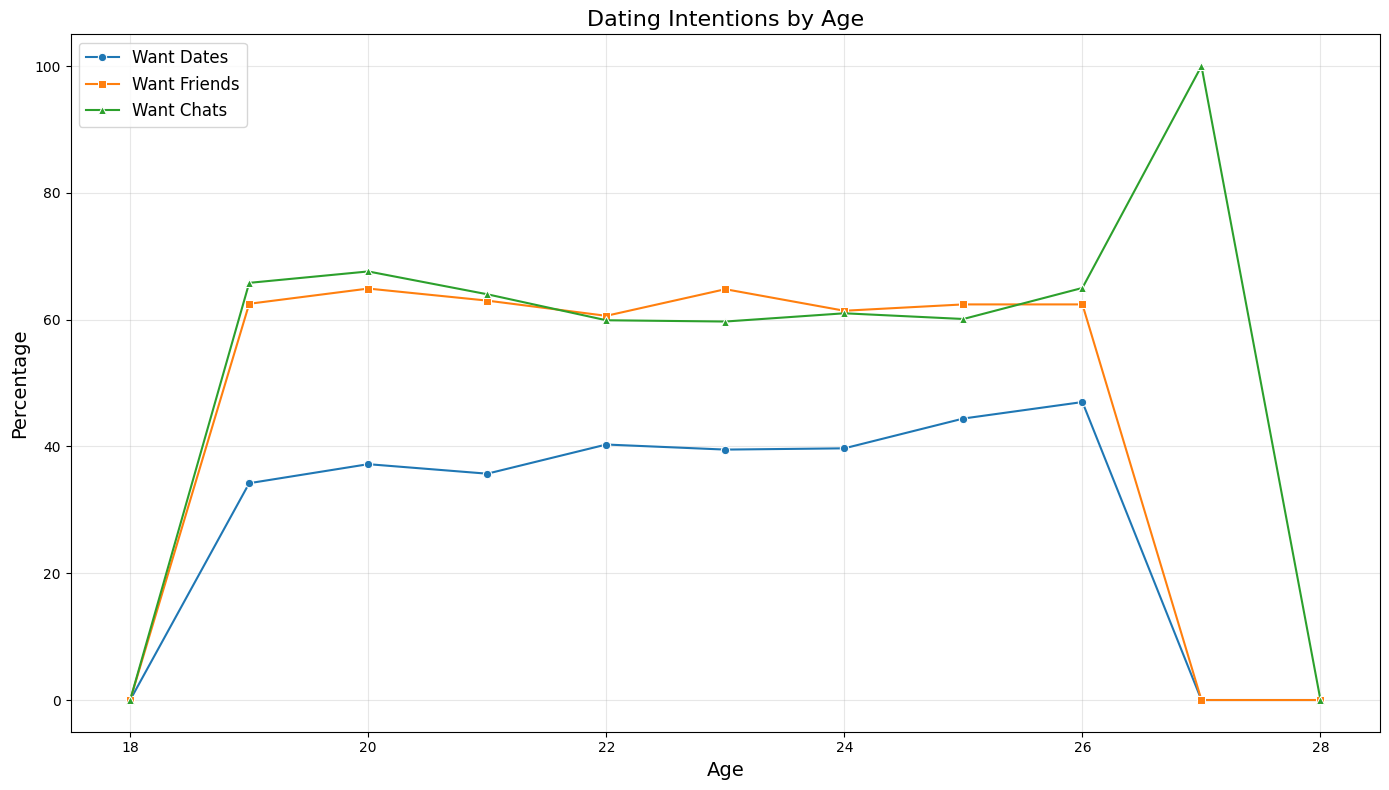

In [9]:
# Analysis 1: Dating Intentions by Age Group
plt.figure(figsize=(14, 8))
sns.lineplot(data=interests_by_age, x='age', y='percentwantdates', marker='o', label='Want Dates')
sns.lineplot(data=interests_by_age, x='age', y='percentwantfriends', marker='s', label='Want Friends')
sns.lineplot(data=interests_by_age, x='age', y='percentwantchats', marker='^', label='Want Chats')
plt.title('Dating Intentions by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('dating_intentions_by_age.png')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

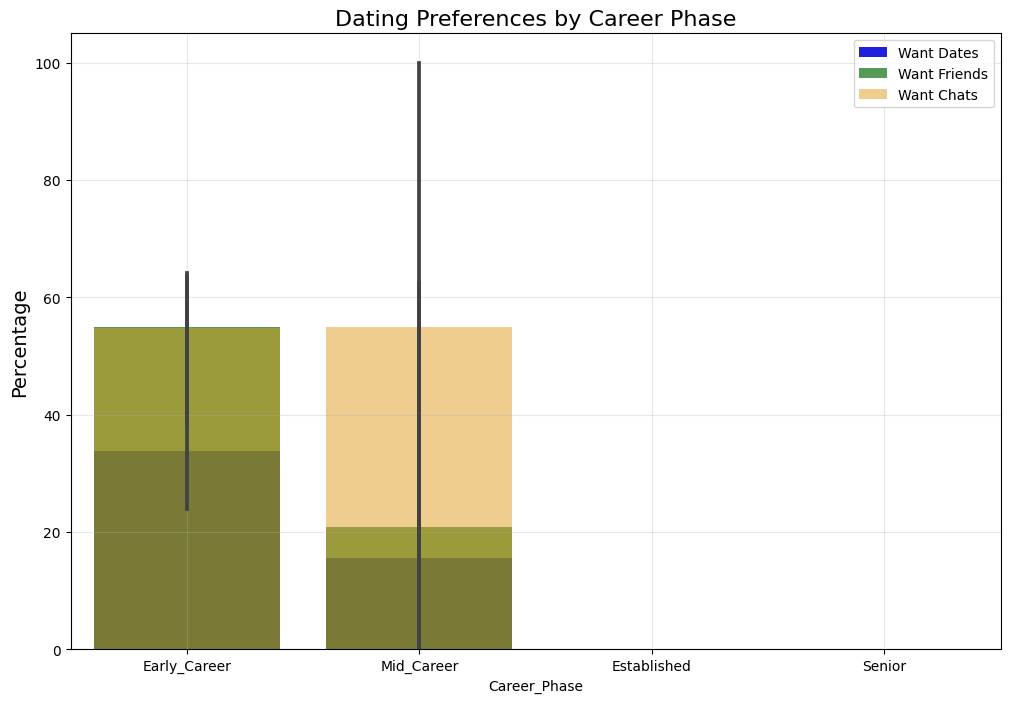

In [10]:
# Analysis of dating intent by career phase
plt.figure(figsize=(12, 8))
sns.barplot(data=interests_by_age, x='Career_Phase', y='percentwantdates', color='blue', label='Want Dates')
sns.barplot(data=interests_by_age, x='Career_Phase', y='percentwantfriends', color='green', alpha=0.7, label='Want Friends')
sns.barplot(data=interests_by_age, x='Career_Phase', y='percentwantchats', color='orange', alpha=0.5, label='Want Chats')

plt.title('Dating Preferences by Career Phase', fontsize=16)
plt.ylabel('Percentage', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

# This would show if career-focused professionals prefer meaningful relationships over casual interactions

<Figure size 1000x600 with 0 Axes>

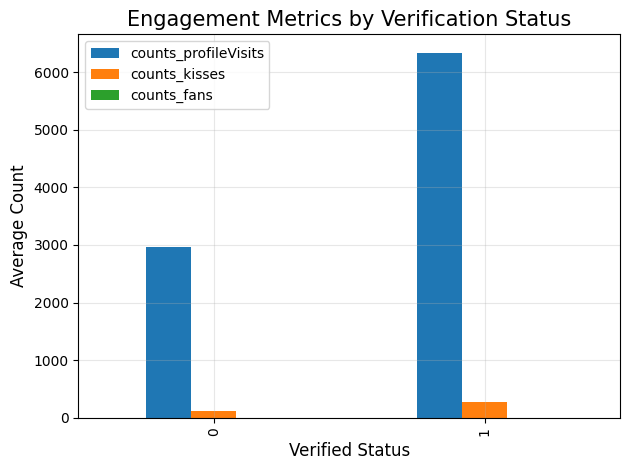

In [11]:
# For users_api_results data
# Analyze connection between verification and engagement
verified_analysis = users_api_results.groupby('verified')[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()

plt.figure(figsize=(10, 6))
verified_analysis.plot(kind='bar')
plt.title('Engagement Metrics by Verification Status', fontsize=15)
plt.ylabel('Average Count', fontsize=12)
plt.xlabel('Verified Status', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# This supports Merge's use of LinkedIn verification to improve engagement and trust

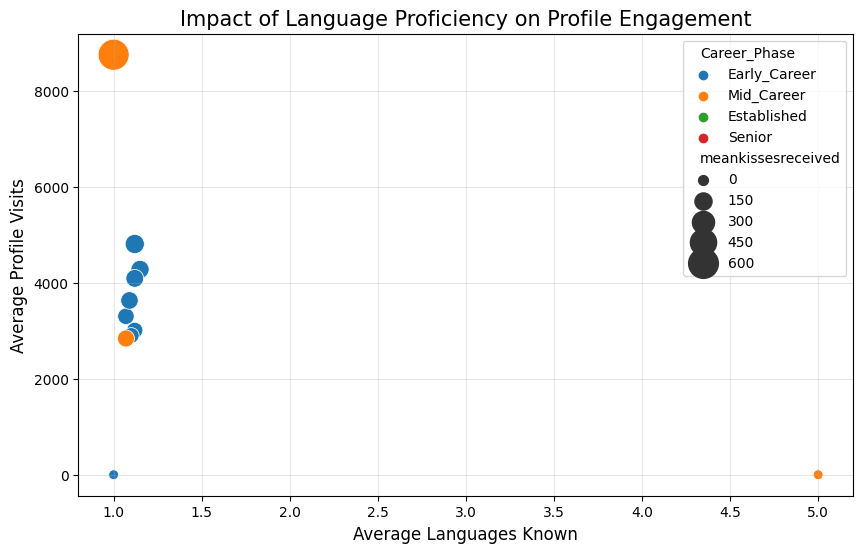

In [12]:
# Create correlation analysis of language proficiency and profile engagement
plt.figure(figsize=(10, 6))
sns.scatterplot(data=interests_by_age, x='meanlanguagesknown', y='meanvisitsreceived', 
                size='meankissesreceived', sizes=(50, 500), hue='Career_Phase')
plt.title('Impact of Language Proficiency on Profile Engagement', fontsize=15)
plt.xlabel('Average Languages Known', fontsize=12)
plt.ylabel('Average Profile Visits', fontsize=12)
plt.grid(True, alpha=0.3)

# This highlights potential unique value of showing language proficiency from LinkedIn profiles